# Load data

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [100]:
df_train = pd.read_csv('data/train.csv')
df_val = pd.read_csv('data/val.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df_train, df_val], axis=0)
df

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,23.90,80.0,6.0,6.0,1,1,1,1,Nhà mặt phố,8.0,5.000000,Long Biên
1,7.40,59.0,5.0,4.0,0,0,0,0,Nhà mặt phố,3.0,5.180581,Bắc Từ Liêm
2,8.40,45.0,4.0,4.0,0,0,0,0,Nhà trong hẻm,3.0,5.180581,Thanh Xuân
3,5.25,35.0,4.0,3.0,1,1,1,0,Nhà trong hẻm,2.5,3.300000,Hà Đông
4,26.00,55.0,9.0,7.0,1,1,1,1,Nhà trong hẻm,7.0,5.180581,Thanh Xuân
...,...,...,...,...,...,...,...,...,...,...,...,...
644,27.00,125.0,5.0,3.0,1,1,1,1,Nhà mặt phố,8.0,6.000000,Ngoại thành
645,31.00,75.0,8.0,10.0,1,1,1,1,Nhà trong hẻm,6.0,6.200000,Thanh Xuân
646,2.80,85.0,5.0,4.0,0,0,0,0,Nhà mặt phố,4.0,4.000000,Ngoại thành
647,12.00,54.0,4.0,6.0,0,0,0,0,Nhà trong hẻm,3.0,4.300000,Hai Bà Trưng


# Visualize bar chart with each feature

In [101]:
features = df.drop(columns=['price', 'area', 'street_in_front_of_house', 'width'])
total_features = features.columns.to_list()
total_features

['floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'type',
 'district']

In [102]:
feature_unique_fields = {}
for i in total_features:
    feature_unique_fields[i] = features[i].unique().tolist()

len_features = len(feature_unique_fields)
for i in range(len_features):
    list(feature_unique_fields.values())[i].sort()
feature_unique_value = {}
for feature in total_features:
    # print("Feature: \n", feature)
    feature_len = len(feature_unique_fields[feature])
    # print("Len: ", feature_len)
    feature_value = feature_unique_fields[feature]
    # print(feature_value)
    feature_unique_value[feature] = [sum(df[df[feature] == feature_value[i]].price) / df[feature].value_counts()[feature_value[i]] for i in range(feature_len)]
    
# print(feature_unique_value)
feature_unique_fields


{'floor_number': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 'bedroom_number': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 'is_dinning_room': [0, 1],
 'is_kitchen': [0, 1],
 'is_terrace': [0, 1],
 'is_car_pack': [0, 1],
 'type': ['Căn hộ chung cư', 'Nhà mặt phố', 'Nhà trong hẻm'],
 'district': ['Ba Đình',
  'Bắc Từ Liêm',
  'Cầu Giấy',
  'Gia Lâm',
  'Hai Bà Trưng',
  'Hoàn Kiếm',
  'Hoàng Mai',
  'Hà Đông',
  'Long Biên',
  'Nam Từ Liêm',
  'Ngoại thành',
  'Thanh Xuân',
  'Tây Hồ',
  'Đông Anh',
  'Đống Đa']}

In [103]:
visualized_features = total_features
name_of_features = ['floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'type',
 'direction',
 'city',
 'district']
labels = ['Số tầng', 'Số phòng ngủ', 'Có phòng ăn hay không', 'Có phòng bếp hay không', 'Có sân thượng hay không', 
'Có chỗ để xe hay không','Loại bất động sản','Thành phố', 'Quận/Huyện']
titles = ['Biểu đồ thể hiện giá nhà trung bình theo số tầng nhà','Biểu đồ giá nhà trung bình theo số phòng ngủ', 'Biểu đồ giá nhà trung bình theo phòng ăn', 
'Biểu đồ giá nhà trung bình có và không có bếp', 'Giá nhà trung bình với sân thượng', 'Giá nhà trung bình với chỗ để xe', 
'Biểu đồ thể hiện giá nhà trung bình theo loại bất động sản', 
'Biểu đồ thể hiện giá nhà trung bình theo thành phố', 'Biểu đồ thể hiện giá nhà trung bình theo quận/huyện bất động sản']

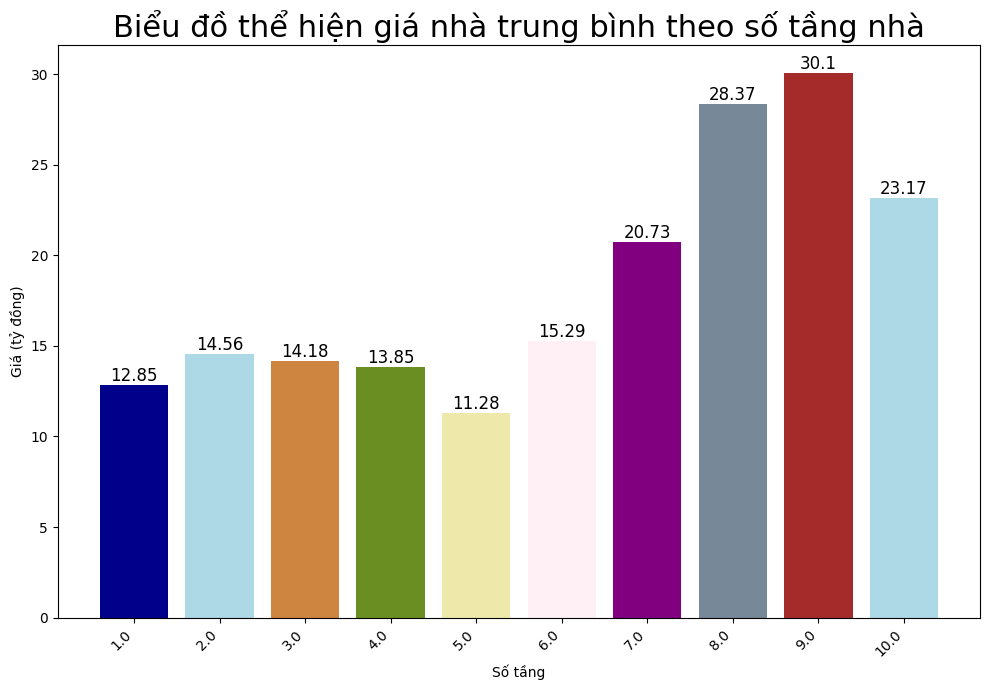

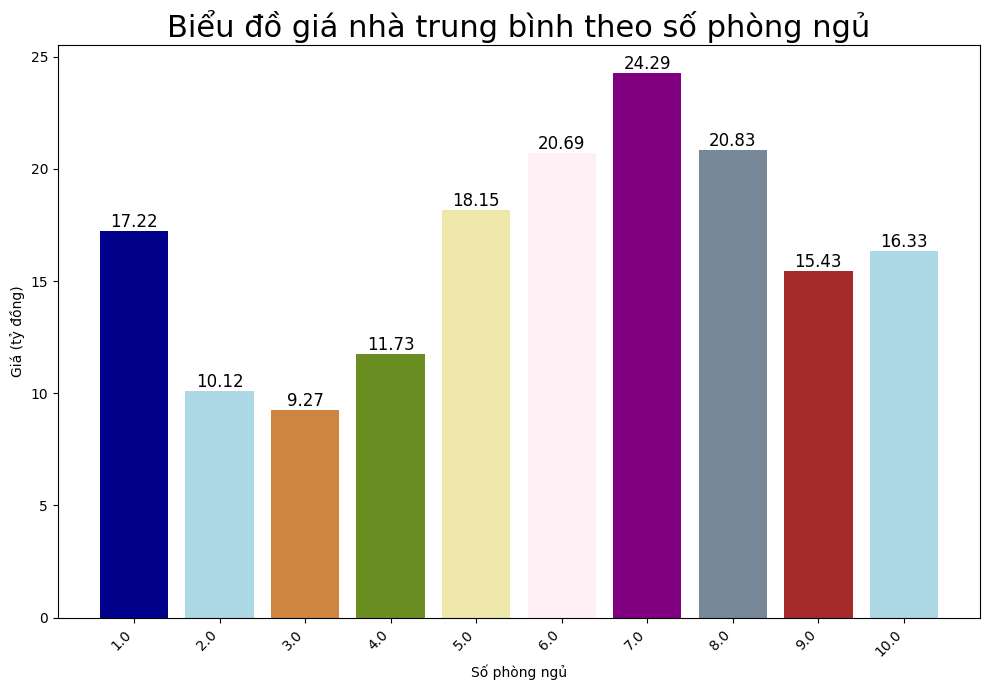

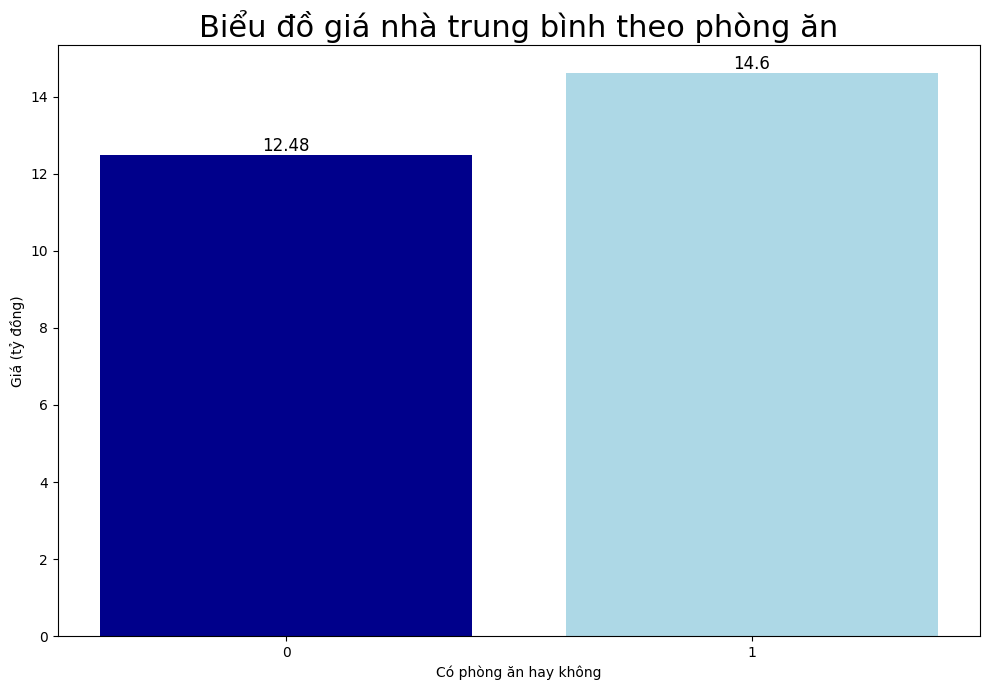

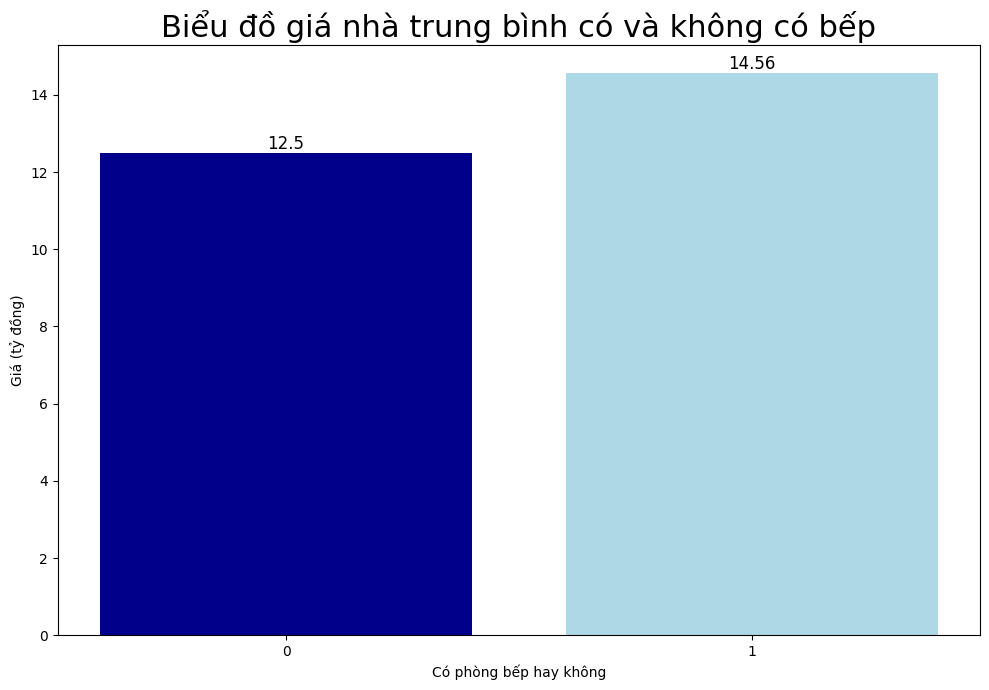

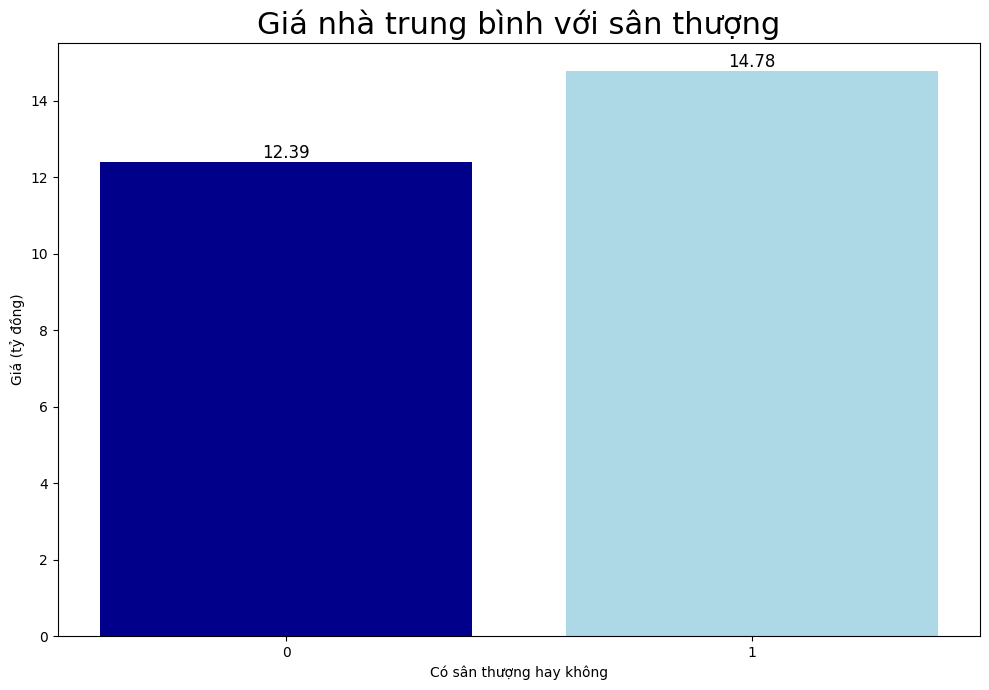

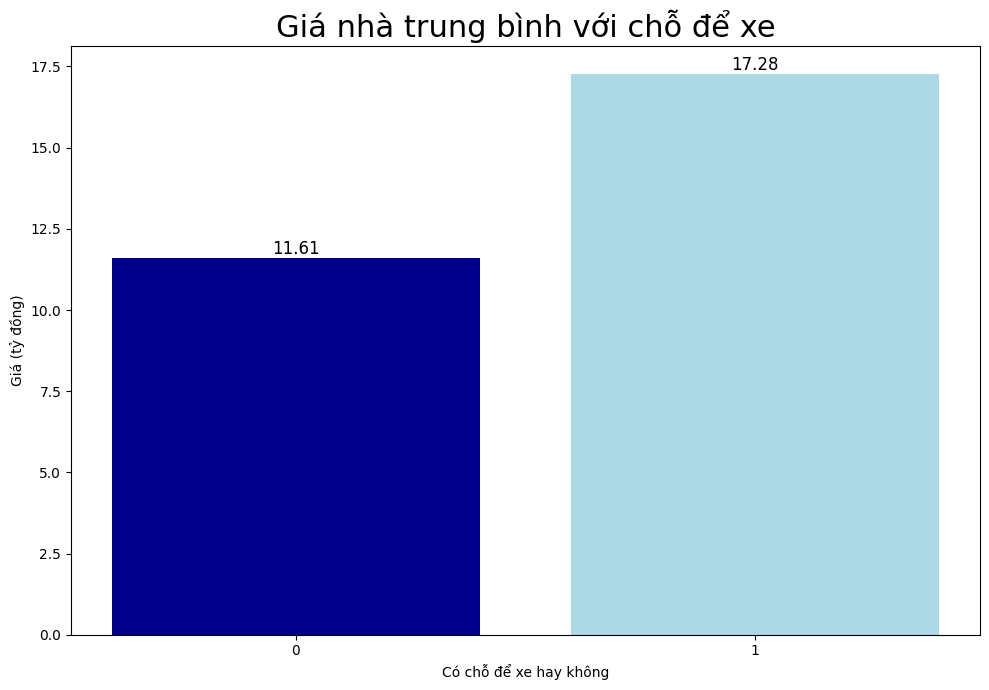

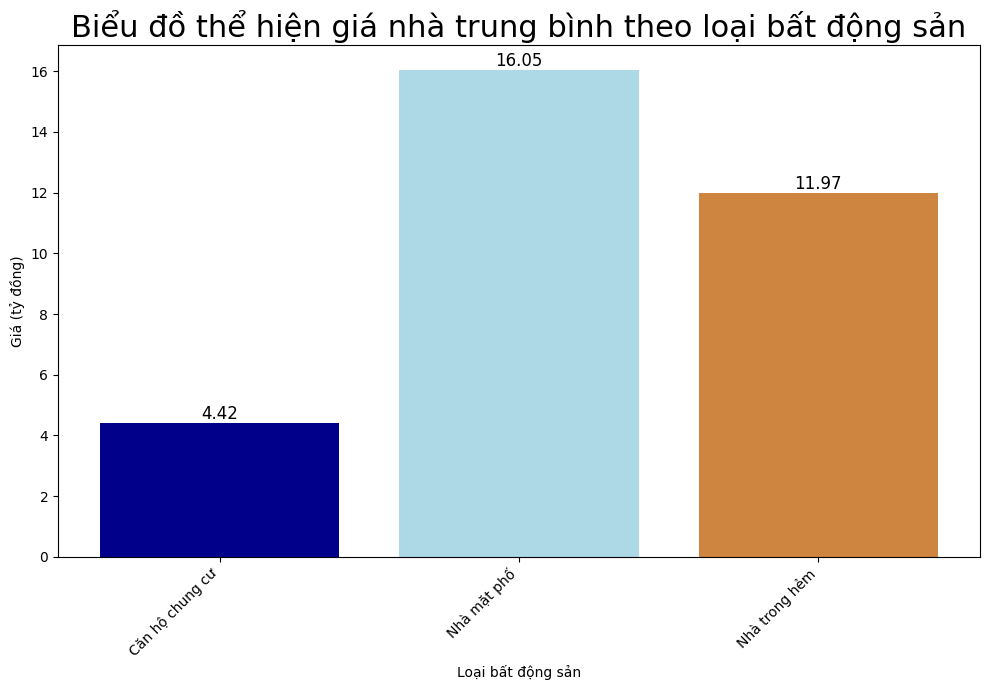

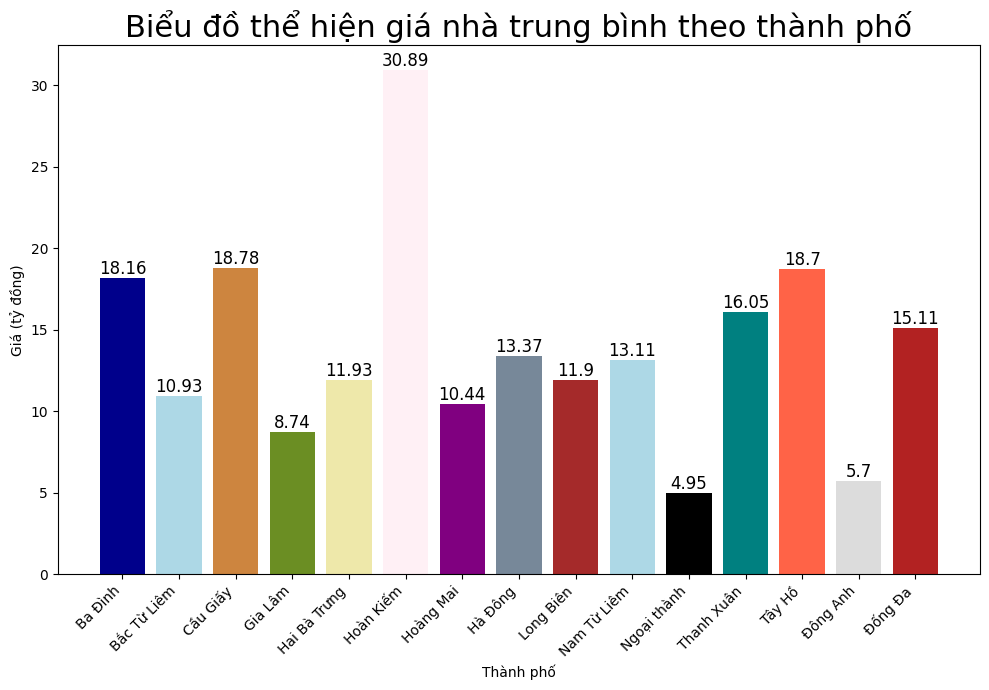

In [104]:
import random
count = 0
for feature in visualized_features:
    N = len(feature_unique_value[feature])
    ind = np.arange(N) 
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=N) 
    text_value = {}
    for i in ind:
        text_value[i] = feature_unique_value[feature][i]
        
    fig = plt.subplots(figsize=(10, 7))
    plt.bar(ind, feature_unique_value[feature], color=c)
    
    for key in text_value:
        plt.text(key, text_value[key], float(round(text_value[key], 2)), 
                horizontalalignment='center', verticalalignment='bottom', 
                fontdict={'fontweight':500, 'size':12})
    
    # Decide whether to rotate labels based on number of categories and label length
    max_label_length = max([len(str(label)) for label in feature_unique_fields[feature]])
    available_width = 10  # Figure width in inches
    
    # Apply rotation if many values or long labels
    if N > 5 or (N * max_label_length > 30):
        plt.xticks(ind, list(feature_unique_fields[feature]), rotation=45, ha='right')
    else:
        plt.xticks(ind, list(feature_unique_fields[feature]))  # No rotation
    
    plt.xlabel(labels[count])
    plt.ylabel("Giá (tỷ đồng)")
    plt.title(titles[count], fontsize=22)
    plt.tight_layout()
    count += 1
    
plt.show()

# Preprocessing to be ready for predict 

In [105]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [106]:
features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
numerical_cols = features_numerical.columns.tolist()

numerical_cols.remove('price')
numerical_cols

['area',
 'floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'street_in_front_of_house',
 'width']

In [107]:
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()
categorical_cols = features_categorical.columns.tolist()
categorical_cols

['type', 'district']

In [108]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)     
    ],
    remainder='passthrough' 
)


In [109]:
y_train = df_train['price'].copy()
y_val = df_val['price'].copy()

df_train = df_train.drop(['price'], axis = 1)
df_val = df_val.drop(['price'], axis = 1)

In [110]:
y_train.to_numpy()
y_val.to_numpy()

array([ 3.2  ,  8.95 , 14.2  , 20.   , 34.5  , 28.5  ,  3.15 ,  4.   ,
        9.   , 22.   , 15.5  , 13.6  , 14.7  ,  6.2  ,  6.5  , 22.5  ,
       10.3  ,  7.5  , 14.2  , 12.5  , 19.2  , 10.   , 20.   , 19.   ,
       11.   ,  9.8  ,  6.3  ,  6.9  , 16.5  , 14.1  ,  7.3  , 12.   ,
        1.7  ,  9.9  ,  6.95 ,  7.2  ,  8.95 ,  7.5  ,  7.5  ,  1.65 ,
       23.5  ,  9.6  ,  4.75 ,  8.3  , 19.   , 13.6  ,  8.65 ,  5.85 ,
        6.95 , 15.5  ,  3.5  , 16.6  ,  8.6  ,  5.8  ,  1.15 , 38.   ,
        6.3  ,  6.5  , 16.8  ,  7.7  ,  6.4  , 45.   , 26.5  , 13.5  ,
        8.5  ,  5.8  , 40.   , 30.   ,  5.5  ,  8.9  ,  1.6  , 25.   ,
        5.8  ,  7.6  , 10.8  , 20.   ,  8.8  ,  6.85 , 34.   , 13.2  ,
        3.7  , 25.5  ,  8.   ,  3.35 , 11.5  , 12.7  , 28.   , 15.9  ,
        8.4  ,  2.25 ,  9.3  ,  5.6  , 48.   , 27.5  ,  5.4  , 21.6  ,
       10.8  , 41.   , 16.   ,  8.1  ,  6.9  ,  4.8  ,  7.5  , 17.   ,
        5.2  , 29.2  , 27.7  , 27.   , 18.6  , 10.   ,  6.3  , 19.5  ,
      

In [111]:
# y_train.shape, y_val.shape

In [112]:
X_train = preprocessor.fit_transform(df_train)
X_val = preprocessor.transform(df_val)
X_test = preprocessor.transform(df_test)

In [113]:
X_train.shape, X_val.shape, X_test.shape

((1945, 27), (649, 27), (649, 27))

In [114]:
from matplotlib import pyplot as plt

def plot_evaluate(y_true, y_pred):
    plt.plot(y_true, y_pred, 'b.')
    x = [np.min(y_true), np.max(y_true)]
    y = x
    plt.plot(x, y, 'r')
    plt.title('XGBoost')
    plt.xlabel('Reality')
    plt.ylabel('Predict')
    plt.show()

# Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [116]:
import copy

class MultipleLinearRegression():
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, x, y):
        # prepare x and y values for coefficient estimates
        x = self._transform_x(x)
        y = self._transform_y(y)

        betas = self._estimate_coefficients(x, y)

        # intercept becomes a vector of ones
        self.intercept = betas[0]

        # coefficients becomes the rest of the betas
        self.coefficients = betas[1:]

    def predict(self, x):
        '''
            y = b_0 + b_1*x + ... + b_i*x_i
        '''
        predictions = []
        for index, row in x.iterrows():
            values = row.values

            pred = np.multiply(values, self.coefficients)
            pred = sum(pred)
            pred += self.intercept

            predictions.append(pred)

        return predictions

    def r2_score(self, y_true, y_pred):
        '''
            r2 = 1 - (rss/tss)
            rss = sum_{i=0}^{n} (y_i - y_hat)^2
            tss = sum_{i=0}^{n} (y_i - y_bar)^2
        '''
        y_values = y_true.values
        y_average = np.average(y_values)

        residual_sum_of_squares = 0
        total_sum_of_squares = 0

        for i in range(len(y_values)):
            residual_sum_of_squares += (y_values[i] - y_pred[i])**2
            total_sum_of_squares += (y_values[i] - y_average)**2

        return 1 - (residual_sum_of_squares/total_sum_of_squares)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        x.insert(0, 'ones', np.ones( (x.shape[0], 1) ))
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values

    def _estimate_coefficients(self, x, y):
        '''
            β = (X^T X)^-1 X^T y
            Estimates both the intercept and all coefficients.
        '''
        xT = x.transpose()

        inversed = np.linalg.inv( xT.dot(x) )
        coefficients = inversed.dot( xT ).dot(y)

        return coefficients


In [117]:
# sử dụng linear regression 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_test_pred = linear_model.predict(X_test)

linear_submit = pd.DataFrame({
    'Id': df_test.index,
    'TARGET': y_test_pred
})
linear_submit.to_csv('results/linear_model.csv', index=False)
## đến đây submit file linear_model lên kaggle là oke

# Ridge Regression

In [ ]:
# linear regression with lasso/ridge with different alpha values
alpha_list = np.logspace(-3, 1, 100)
mse_train_ridge = []
mse_train_lasso = []
mse_validation_ridge = []
mse_validation_lasso = []

for alpha in alpha_list:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_train_pred = ridge_model.predict(X_train)
    mse_train_ridge.append((alpha, mean_squared_error(y_train, y_train_pred)))
    y_val_pred = ridge_model.predict(X_val)
    mse_validation_ridge.append((alpha, mean_squared_error(y_val, y_val_pred)))
    # loss_train_ridge.append((alpha, mean_squared_error(y_train, y_train_pred)))
    # loss_validation_ridge.append((alpha, mean_squared_error(y_val, y_val_pred)))

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_train_pred = lasso_model.predict(X_train)
    mse_train_lasso.append((alpha, mean_squared_error(y_train, y_train_pred)))
    y_val_pred = lasso_model.predict(X_val)
    mse_validation_lasso.append((alpha, mean_squared_error(y_val, y_val_pred)))

    # loss_train_lasso.append((alpha, mean_squared_error(y_train, y_train_pred)))
    # loss_validation_lasso.append((alpha, mean_squared_error(y_val, y_val_pred)))

(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)


(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1

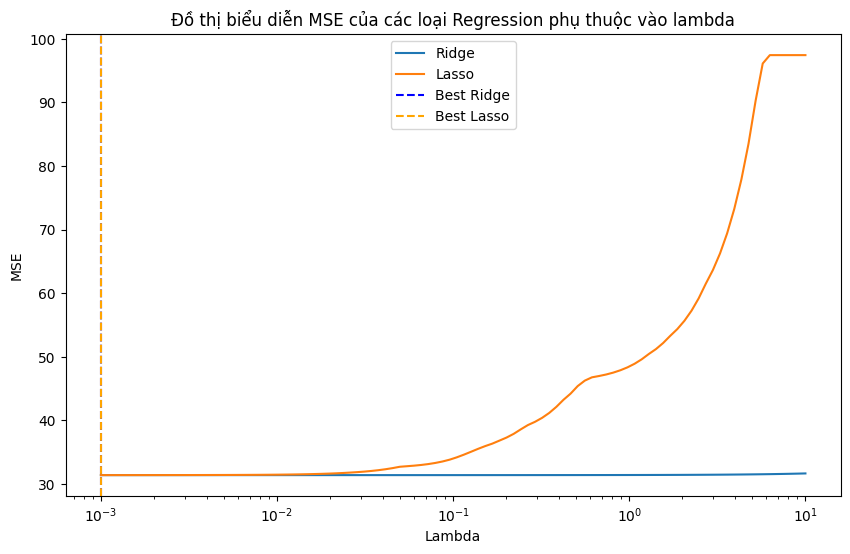

In [131]:
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in mse_validation_ridge], [x[1] for x in mse_validation_ridge], label='Ridge')
plt.plot([x[0] for x in mse_validation_lasso], [x[1] for x in mse_validation_lasso], label='Lasso')
# Highlight the best alpha for Ridge and Lasso
best_alpha_ridge = min(mse_validation_ridge, key=lambda x: x[1])[0]
best_alpha_lasso = min(mse_validation_lasso, key=lambda x: x[1])[0]
plt.axvline(x=best_alpha_ridge, color='blue', linestyle='--', label='Best Ridge')
plt.axvline(x=best_alpha_lasso, color='orange', linestyle='--', label='Best Lasso')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Đồ thị biểu diễn MSE của các loại Regression phụ thuộc vào lambda')
plt.legend()
plt.show()

In [120]:
alpha_best = np.argmin([x[1] for x in mse_validation_ridge])
alpha_best = alpha_list[alpha_best]
print(f"Lambda tốt nhất cho Ridge Regression là: {alpha_best}")
ridge_model = Ridge(alpha=alpha_best)
ridge_model.fit(X_train, y_train)
y_test_pred = ridge_model.predict(X_test)
ridge_submit = pd.DataFrame({
    'Id': df_test.index,
    'TARGET': y_test_pred
})
ridge_submit.to_csv('results/ridge_model.csv', index=False)

Lambda tốt nhất cho Ridge Regression là: 0.001


In [121]:
alpha_best = np.argmin([x[1] for x in mse_validation_lasso])
alpha_best = alpha_list[alpha_best]
print(f"Lambda tốt nhất cho Lasso Regression là: {alpha_best}")
lasso_model = Lasso(alpha=alpha_best)
lasso_model.fit(X_train, y_train)
y_test_pred = lasso_model.predict(X_test)
lasso_submit = pd.DataFrame({
    'Id': df_test.index,
    'TARGET': y_test_pred
})
lasso_submit.to_csv('results/lasso_model.csv', index=False)

Lambda tốt nhất cho Lasso Regression là: 0.001


# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression with different degrees of polynomial features
polynomial_degrees = [1, 2, 3]
mse_train_poly = []
mse_validation_poly = []

for degree in polynomial_degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_train_pred = poly_model.predict(X_train_poly)
    mse_train_poly.append((degree, mean_squared_error(y_train, y_train_pred)))

    X_val_poly = poly_features.fit_transform(X_val)
    y_val_pred = poly_model.predict(X_val_poly)
    mse_validation_poly.append((degree, mean_squared_error(y_val, y_val_pred)))
    print(y_train_pred.shape, y_train.shape, y_val_pred.shape, y_val.shape)

(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)
(1945,) (1945,) (649,) (649,)


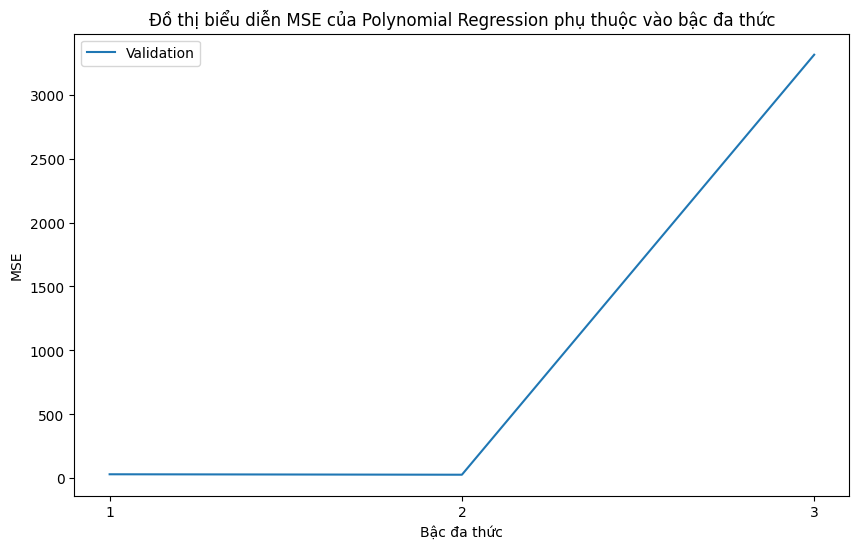

In [134]:
# print(r2_train_poly)
# print(r2_validation_poly)

# vẽ phụ thuộc vào degree
plt.figure(figsize=(10, 6))
# plt.plot([x[0] for x in mse_train_poly], [x[1] for x in mse_train_poly], label='Train')
plt.plot([x[0] for x in mse_validation_poly], [x[1] for x in mse_validation_poly], label='Validation')
plt.xticks(polynomial_degrees)
plt.xlabel('Bậc đa thức')
plt.ylabel('MSE')
plt.title('Đồ thị biểu diễn MSE của Polynomial Regression phụ thuộc vào bậc đa thức')
plt.legend()
plt.show()

In [124]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
X_test_poly = poly_features.fit_transform(X_test)
y_test_pred = poly_model.predict(X_test_poly)
poly_submit = pd.DataFrame({
    'Id': df_test.index,
    'TARGET': y_test_pred
})
poly_submit.to_csv('results/poly_model.csv', index=False)

# Polynomial Regression Lasso

In [ ]:
# polynomial regression with lasso/ridge with different alpha values
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)

alpha_list = np.logspace(-3, 1, 100)
mse_train_ridge_poly = []
mse_train_lasso_poly = []
mse_validation_ridge_poly = []
mse_validation_lasso_poly = []

for alpha in alpha_list:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    y_train_pred = ridge_model.predict(X_train_poly)
    mse_train_ridge_poly.append((alpha, mean_squared_error(y_train, y_train_pred)))
    y_val_pred = ridge_model.predict(X_val_poly)
    mse_validation_ridge_poly.append((alpha, mean_squared_error(y_val, y_val_pred)))

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly, y_train)
    y_train_pred = lasso_model.predict(X_train_poly)
    mse_train_lasso_poly.append((alpha, mean_squared_error(y_train, y_train_pred)))
    y_val_pred = lasso_model.predict(X_val_poly)
    mse_validation_lasso_poly.append((alpha, mean_squared_error(y_val, y_val_pred)))

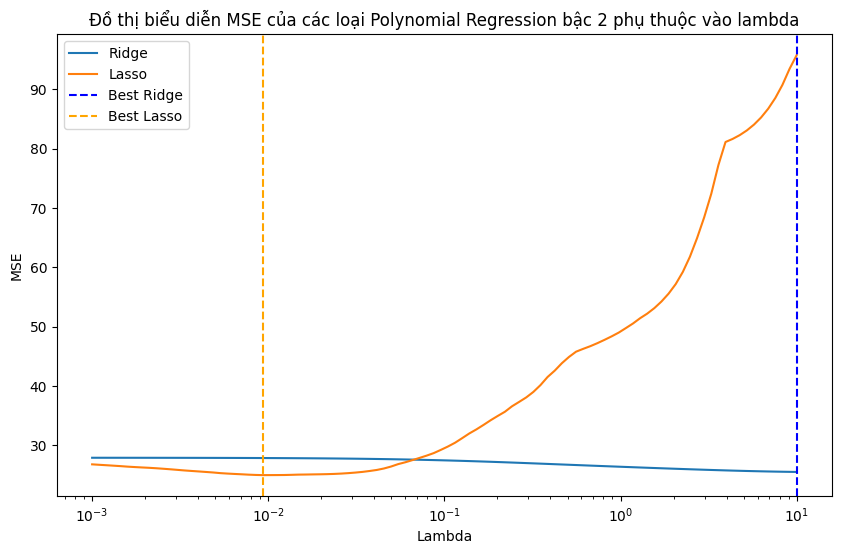

In [135]:
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in mse_validation_ridge_poly], [x[1] for x in mse_validation_ridge_poly], label='Ridge')
plt.plot([x[0] for x in mse_validation_lasso_poly], [x[1] for x in mse_validation_lasso_poly], label='Lasso')
# Highlight the best alpha for Ridge and Lasso
best_alpha_ridge_poly = min(mse_validation_ridge_poly, key=lambda x: x[1])[0]
best_alpha_lasso_poly = min(mse_validation_lasso_poly, key=lambda x: x[1])[0]
plt.axvline(x=best_alpha_ridge_poly, color='blue', linestyle='--', label='Best Ridge')
plt.axvline(x=best_alpha_lasso_poly, color='orange', linestyle='--', label='Best Lasso')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Đồ thị biểu diễn MSE của các loại Polynomial Regression bậc 2 phụ thuộc vào lambda')
plt.legend()
plt.show()

In [127]:
alpha_best = np.argmin([x[1] for x in mse_validation_ridge_poly])
alpha_best = alpha_list[alpha_best]
print(f"Lambda tốt nhất cho Ridge Polynomial Regression là: {alpha_best}")
ridge_model = Ridge(alpha=alpha_best)
ridge_model.fit(X_train_poly, y_train)
X_test_poly = poly_features.fit_transform(X_test)
y_test_pred = ridge_model.predict(X_test_poly)
ridge_poly_submit = pd.DataFrame({
    'Id': df_test.index,
    'TARGET': y_test_pred
})
ridge_poly_submit.to_csv('results/ridge_poly_model.csv', index=False)

Lambda tốt nhất cho Ridge Polynomial Regression là: 10.0


In [128]:
alpha_best = np.argmin([x[1] for x in mse_validation_lasso_poly])
alpha_best = alpha_list[alpha_best]
print(f"Lambda tốt nhất cho Lasso Polynomial Regression là: {alpha_best}")
lasso_model = Lasso(alpha=alpha_best)
lasso_model.fit(X_train_poly, y_train)
X_test_poly = poly_features.fit_transform(X_test)
y_test_pred = lasso_model.predict(X_test_poly)
lasso_poly_submit = pd.DataFrame({
    'Id': df_test.index,
    'TARGET': y_test_pred
})
lasso_poly_submit.to_csv('results/lasso_poly_model.csv', index=False)

Lambda tốt nhất cho Lasso Polynomial Regression là: 0.0093260334688322
